<a href="https://colab.research.google.com/github/kaif1808/22E035/blob/main/Foundations_of_DS_06_Introduction_to_Ggplot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the required packages

We use the `ggplot2` package for plotting.

In [ ]:
library(ggplot2)
library(readr)
library(dplyr)
library(forcats)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Load the data

In [ ]:
system("gdown 1dTApAqI_A1uliiinV711RG2ox5u5KReS")
d = read_csv('/content/iris.csv')
d = d %>%
  mutate(iris_type = as_factor(iris_type))

Rows: 150 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): iris_type
dbl (4): sepal_length, sepal_width, petal_length, petal_width

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Scatter plots

Function `ggplot` can be used for multiple plot types. It requires:

* The data to plot
* An "aesthetic mapping" describing how data features are mapped to visual aspects of the plot. For example, which feature goes on the *x* axis and which on the *y* axis.

Then, the plot function is combined via the `+` operator with a second function defining the type of plot required. In our first example, this will be a scatter plot which, in `ggplot`'s terminology is `geom_point`, i.e., the geometric representation of each observation is a point.

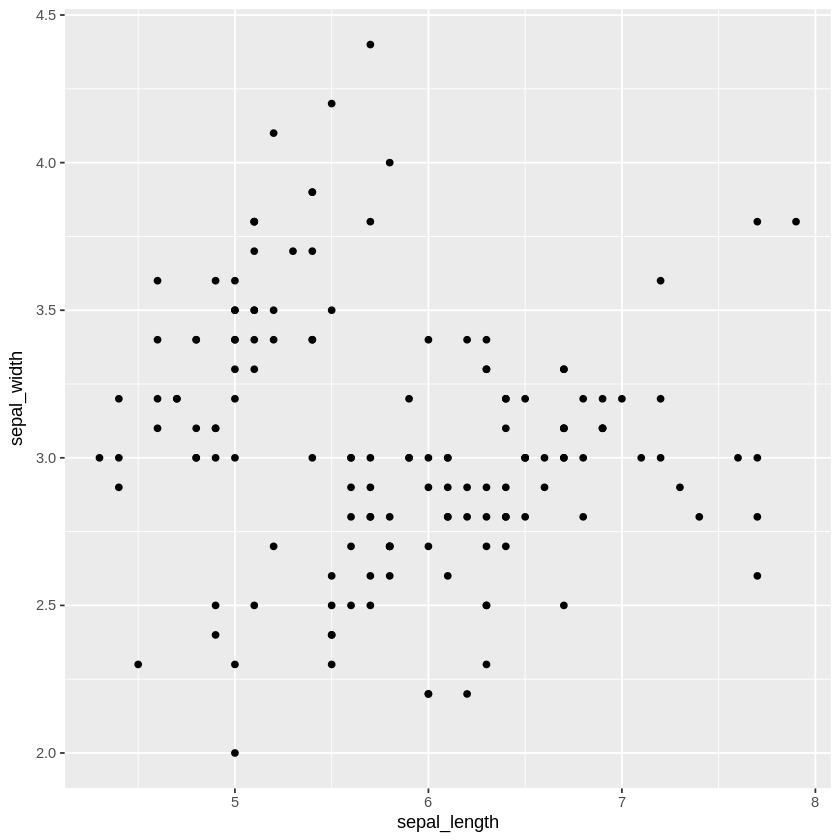

In [ ]:
ggplot(data = d, mapping = aes(x = sepal_length, y = sepal_width)) + geom_point()

We use `geom_point` to customise the plot's appearance.

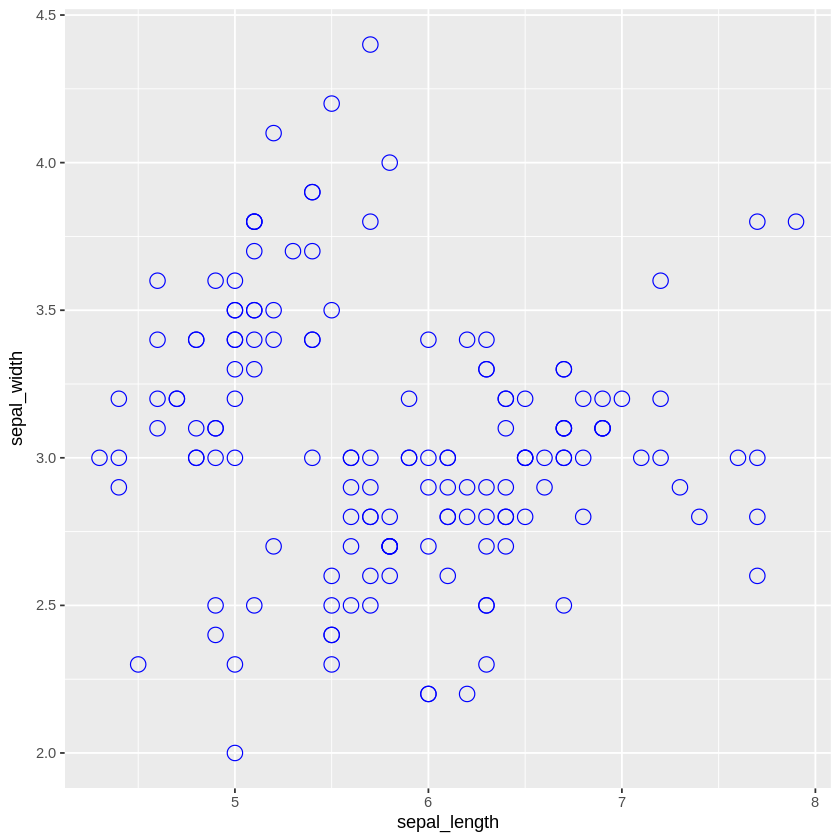

In [ ]:
ggplot(data = d, mapping = aes(x = sepal_length, y = sepal_width)) + geom_point(size = 4, colour = 'blue', shape = 1)

We can also colour the points based on a categorical feature, similar to what we achieve with the `hue` named parameter in Python's `sns.scatterplot`.

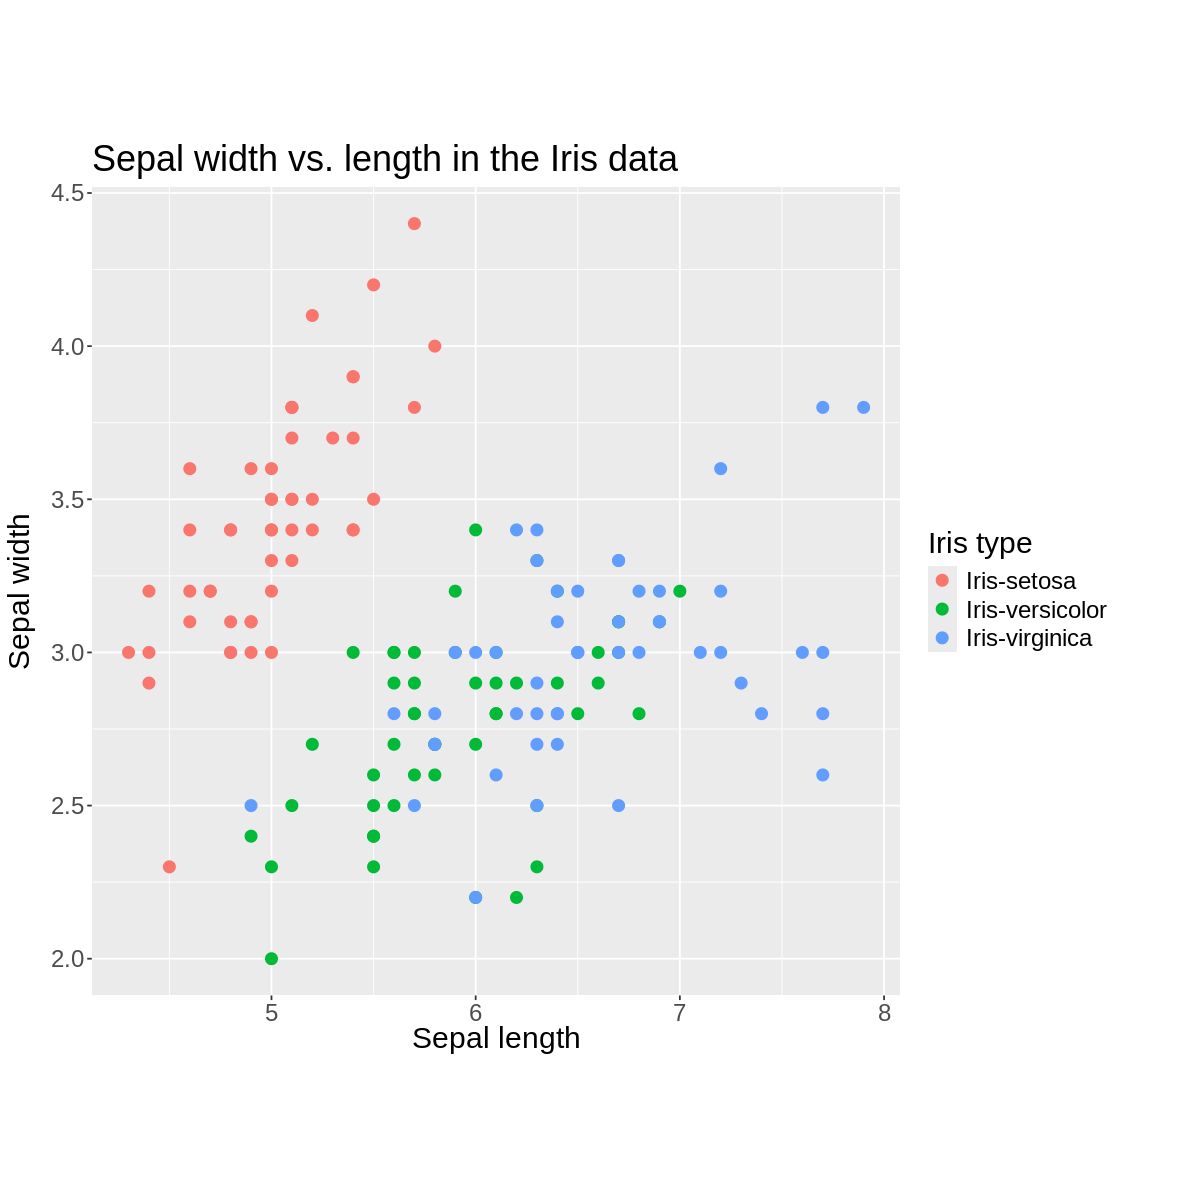

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(data = d, mapping = aes(x = sepal_length, y = sepal_width)) +
  geom_point(mapping = aes(colour = iris_type), size = 3) +
  labs(x = "Sepal length", y = "Sepal width", title = "Sepal width vs. length in the Iris data", colour = "Iris type") +
  theme(aspect.ratio = 1, text = element_text(size = 18))

### Multiple scatter plots

In [ ]:
install.packages("ggpubr")
library(ggpubr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’




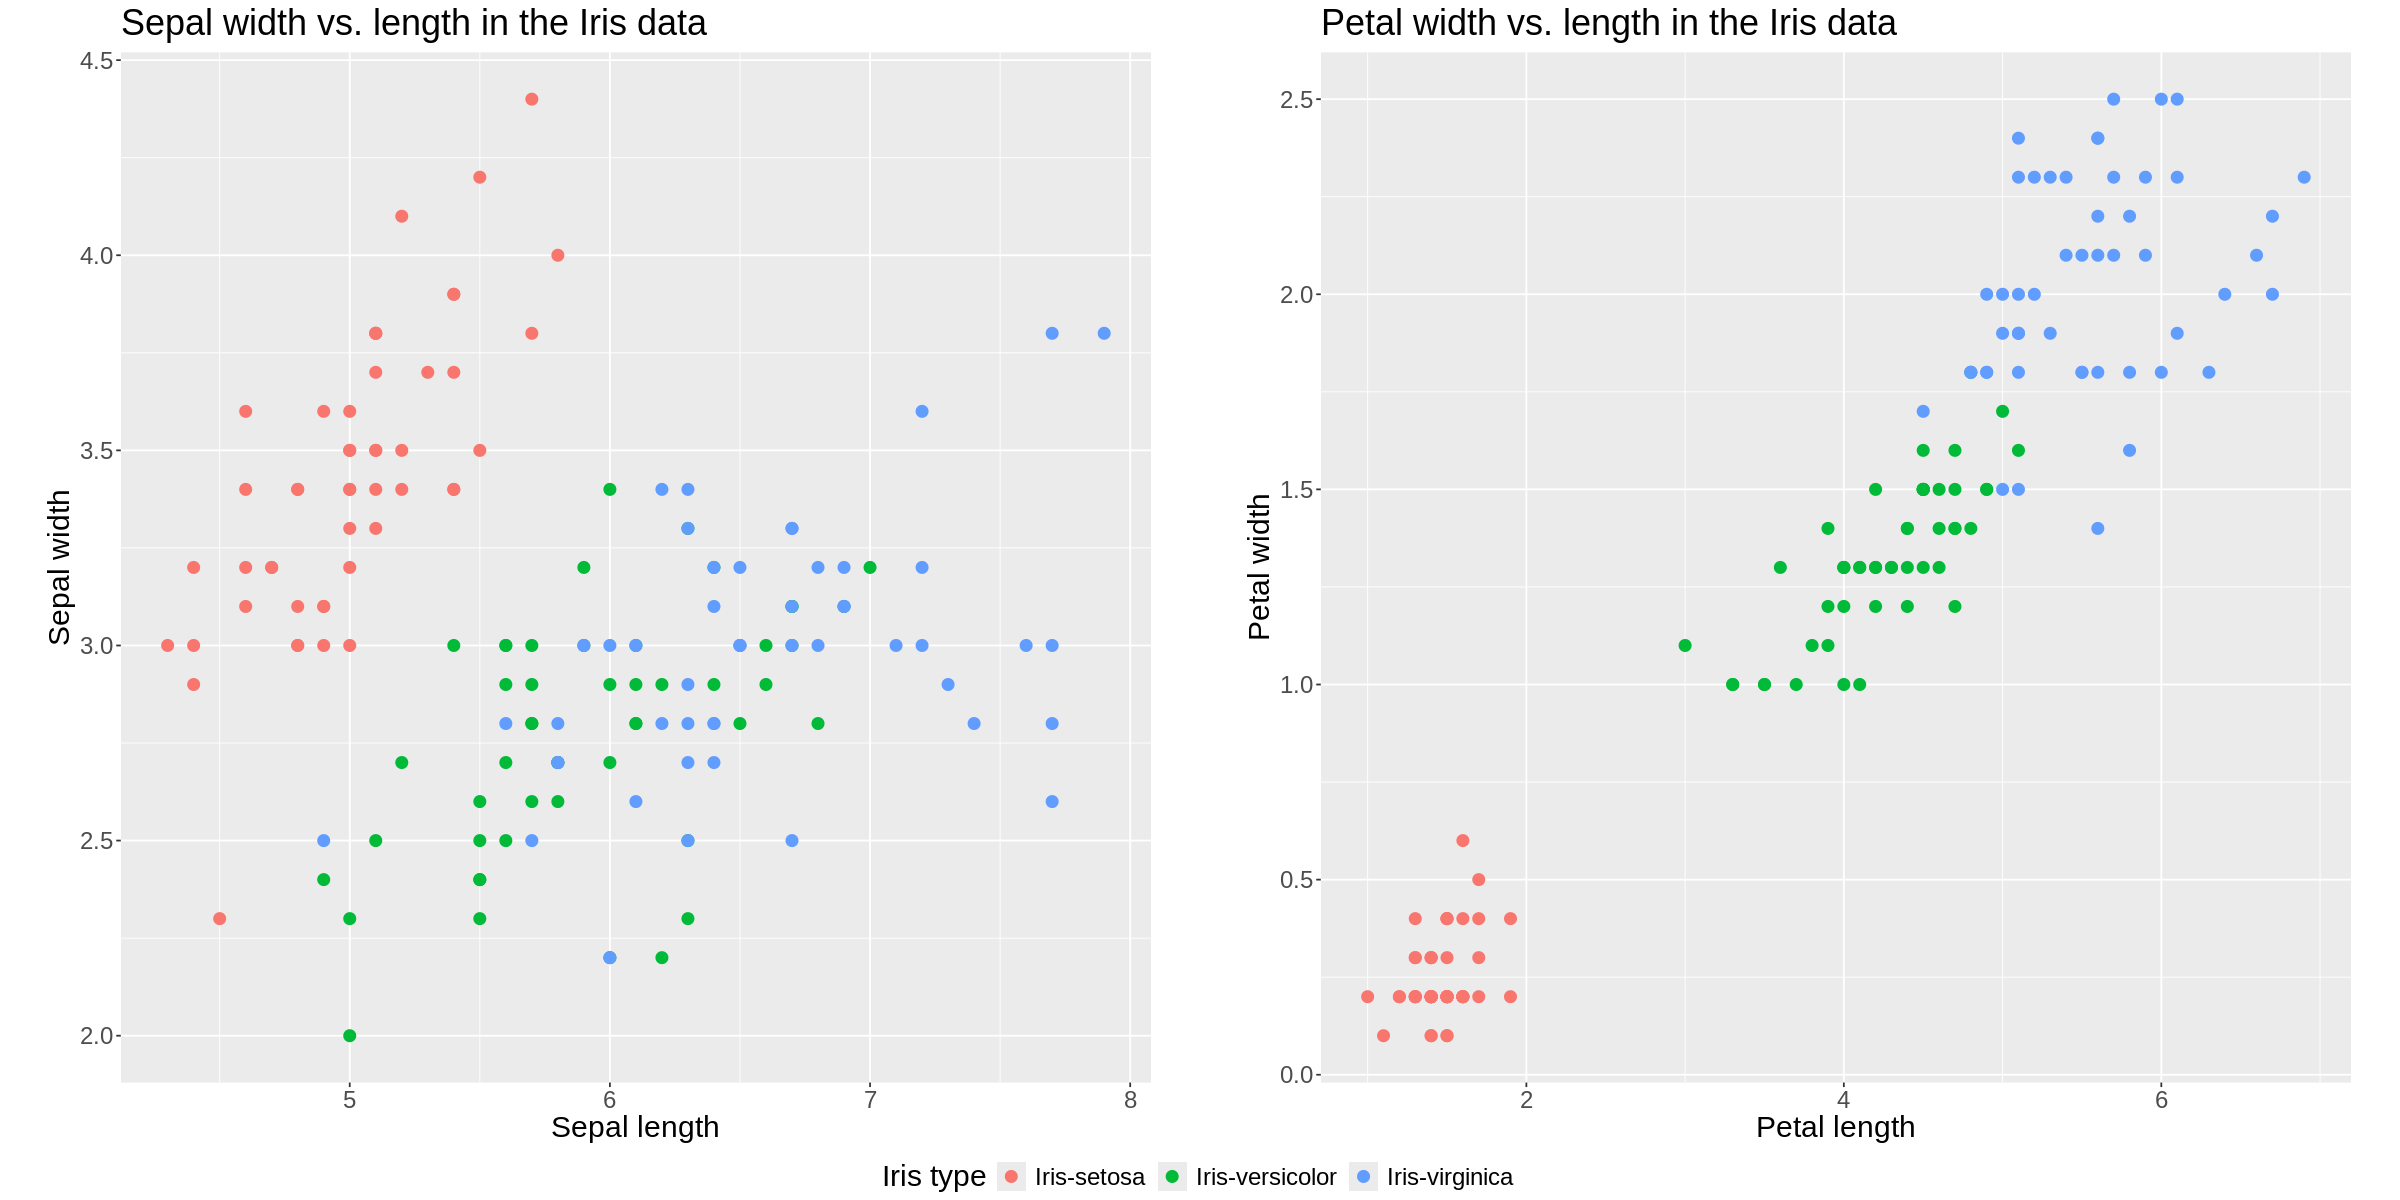

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 10)
plot1 = ggplot(data = d, mapping = aes(x = sepal_length, y = sepal_width)) +
  geom_point(mapping = aes(colour = iris_type), size = 3) +
  labs(x = "Sepal length", y = "Sepal width", title = "Sepal width vs. length in the Iris data", colour = "Iris type") +
  theme(aspect.ratio = 1, text = element_text(size = 18))
plot2 = ggplot(data = d, mapping = aes(x = petal_length, y = petal_width)) +
  geom_point(mapping = aes(colour = iris_type), size = 3) +
  labs(x = "Petal length", y = "Petal width", title = "Petal width vs. length in the Iris data", colour = "Iris type") +
  theme(aspect.ratio = 1, text = element_text(size = 18))
ggarrange(plot1, plot2, ncol = 2, common.legend = TRUE, legend="bottom")

In [ ]:
install.packages("GGally")
library(GGally)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’




`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


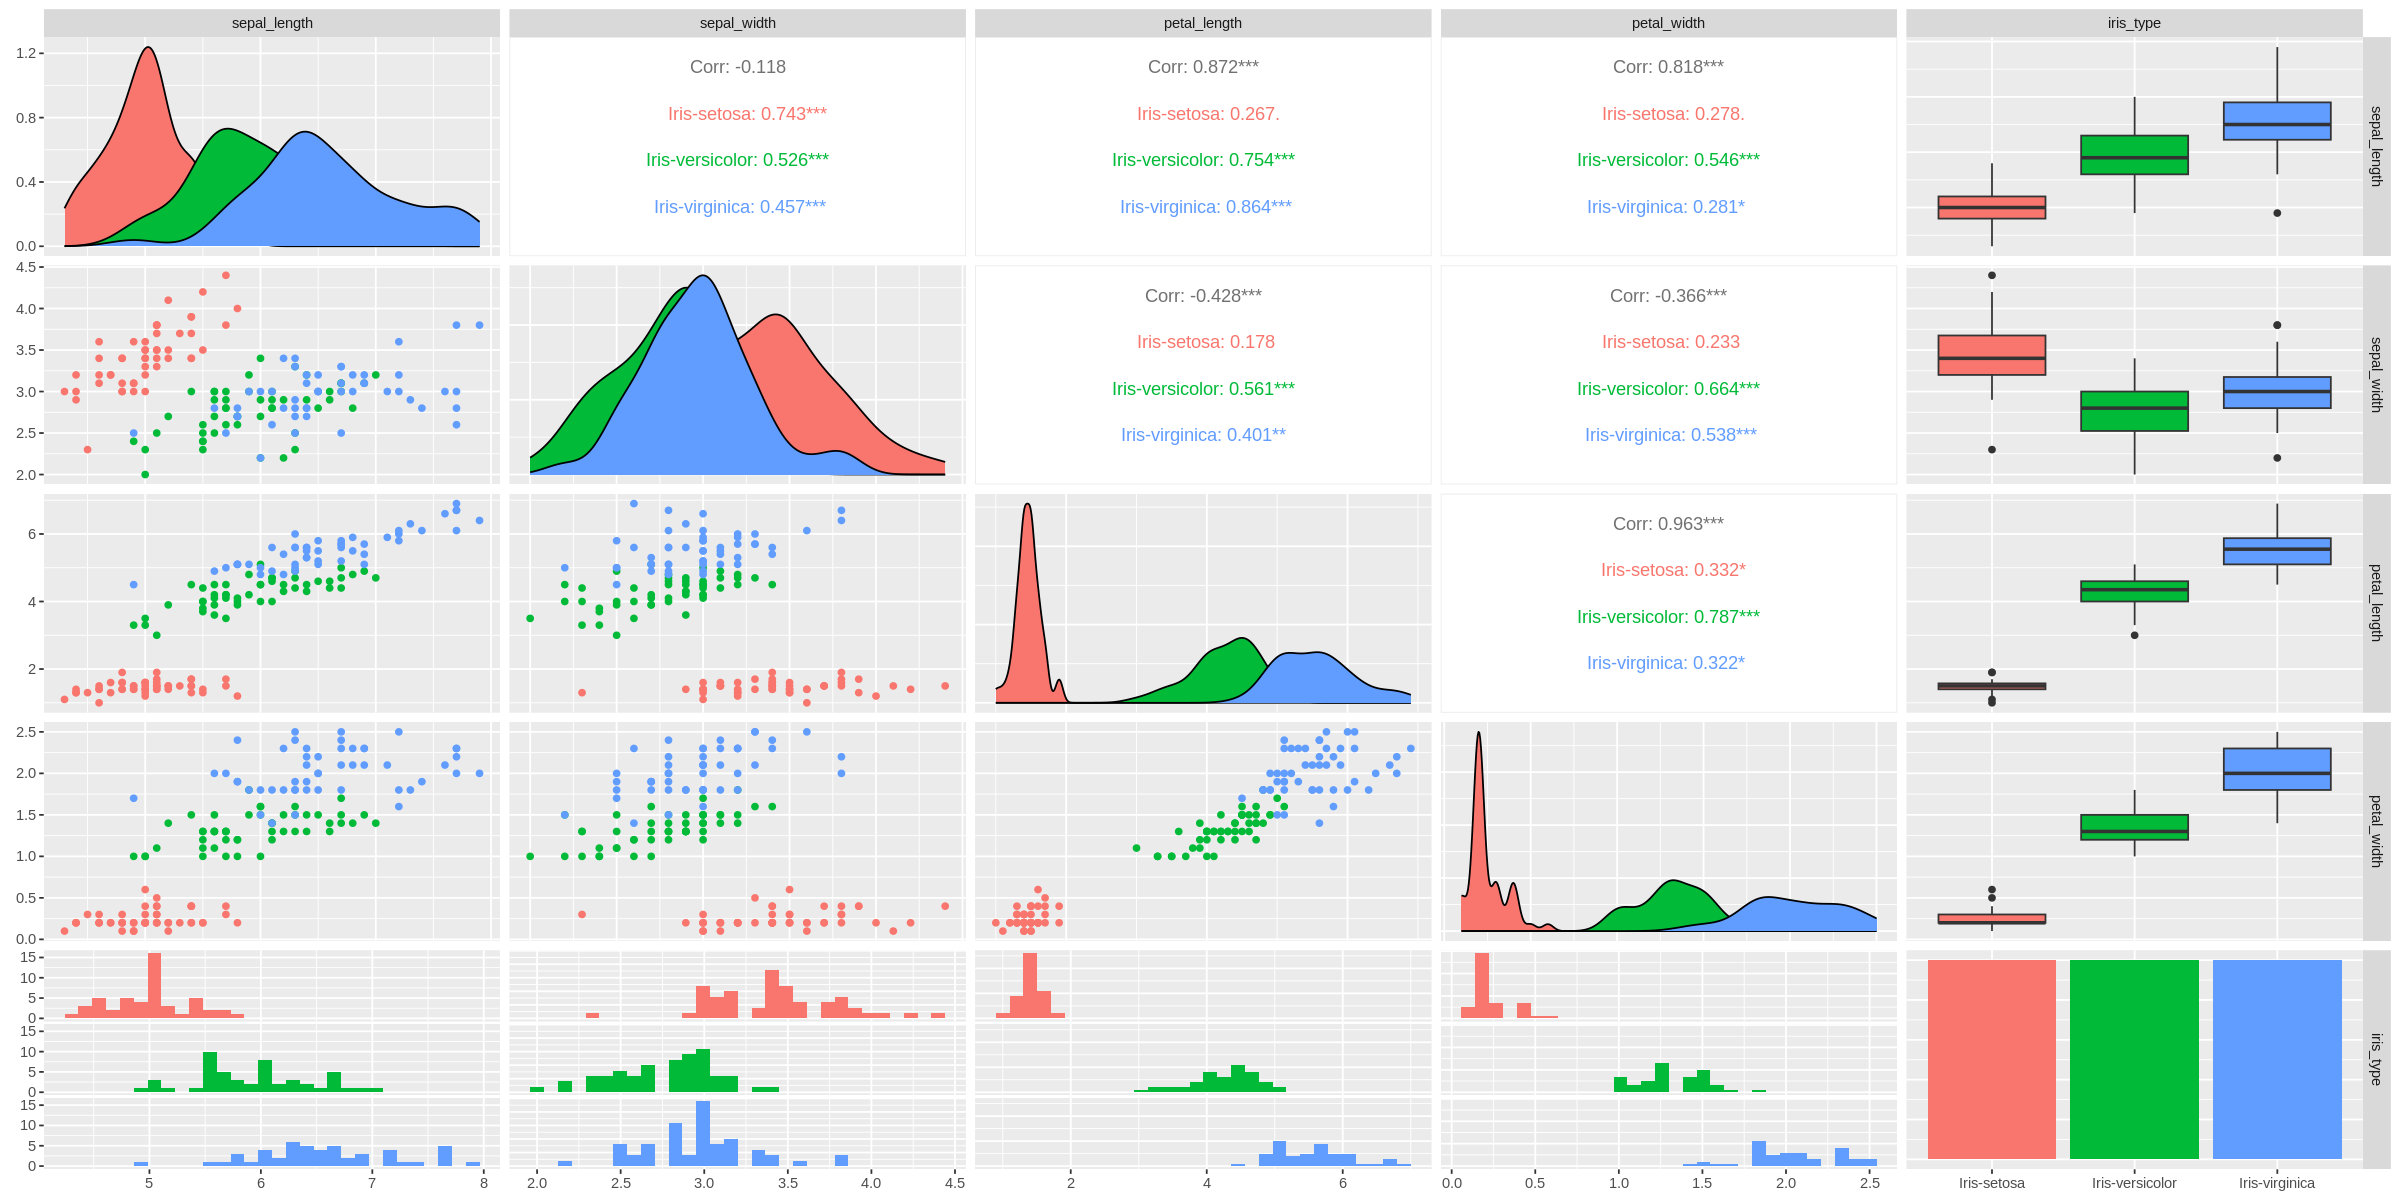

In [ ]:
ggpairs(data = d, mapping = aes(colour = iris_type))

# Box plots

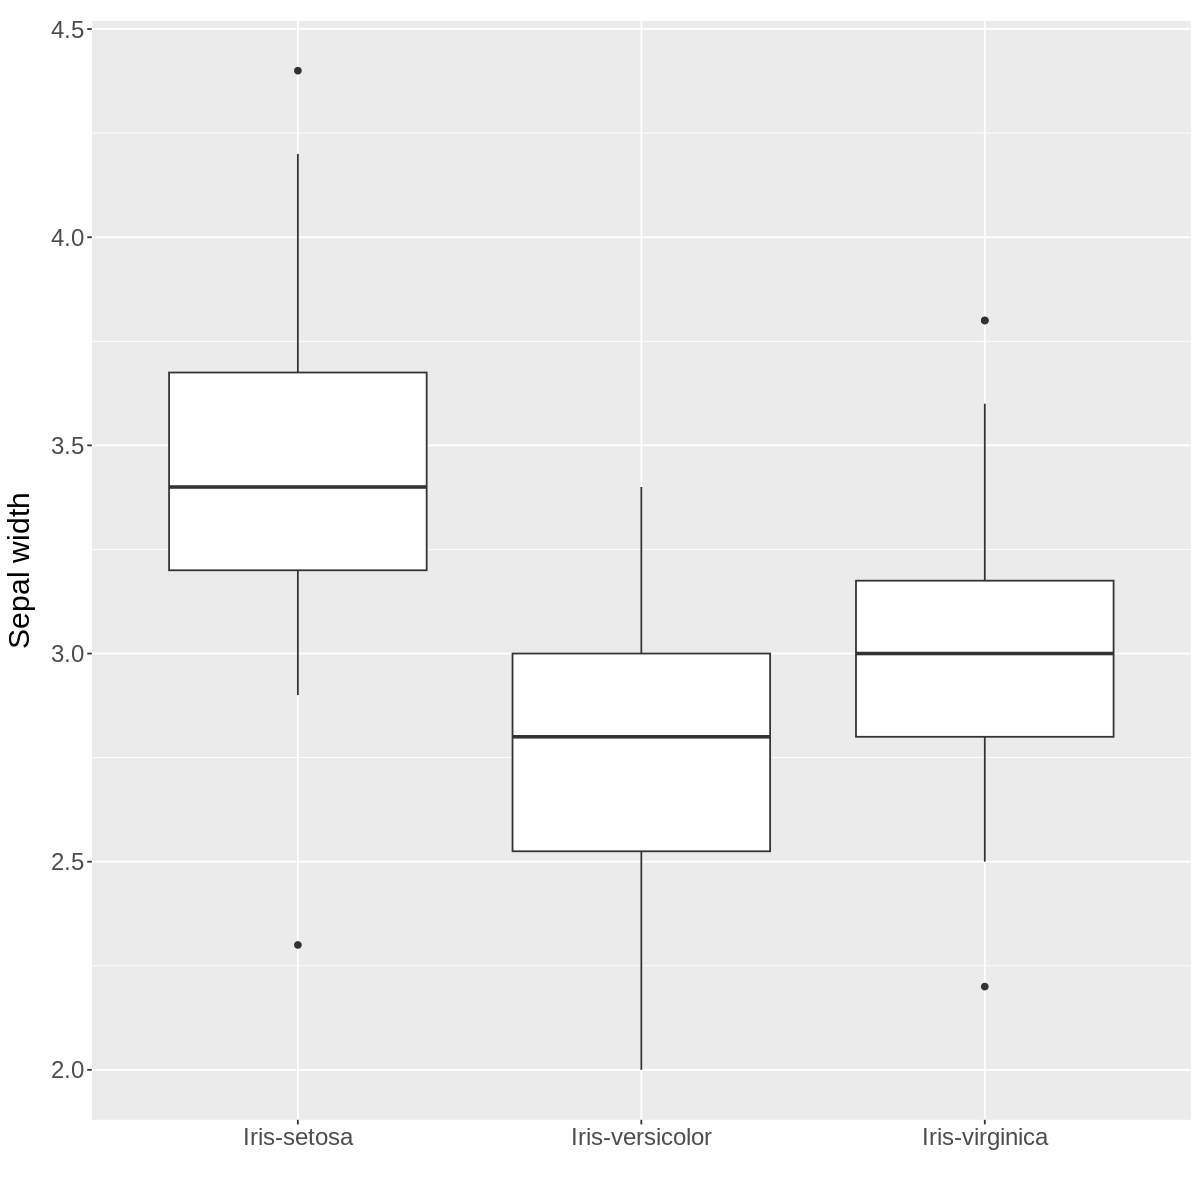

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(data = d, mapping = aes(x = iris_type, y = sepal_width)) +
  geom_boxplot() +
  labs(x = "", y = "Sepal width") +
  theme(aspect.ratio = 1, text = element_text(size = 18))

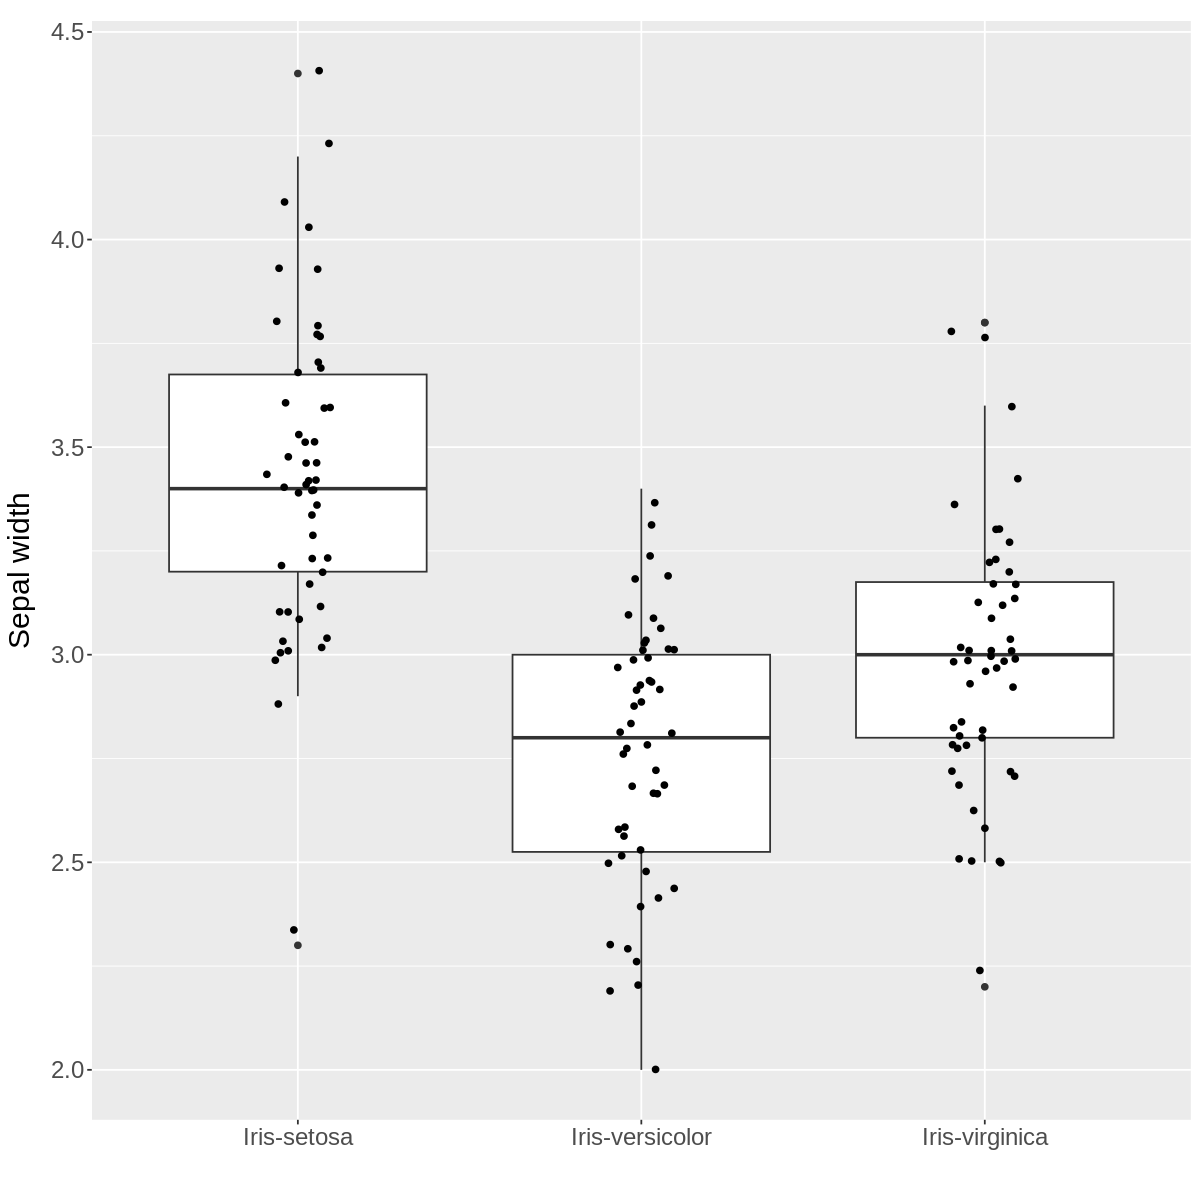

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(data = d, mapping = aes(x = iris_type, y = sepal_width)) +
  geom_boxplot() +
  geom_jitter(width = 0.1) +
  labs(x = "", y = "Sepal width") +
  theme(aspect.ratio = 1, text = element_text(size = 18))

# Histograms

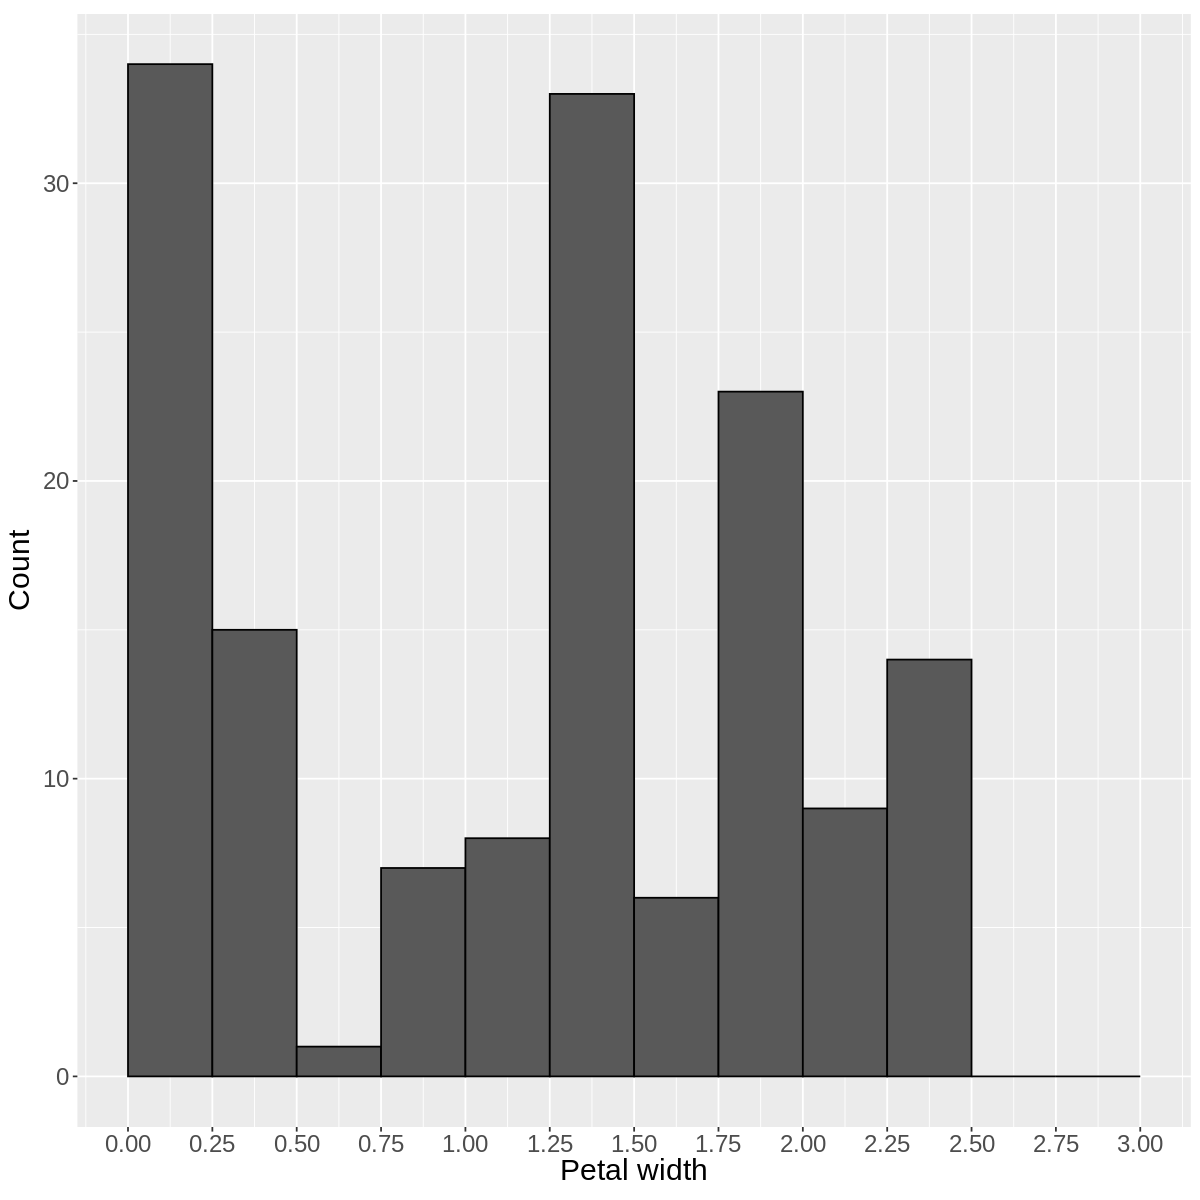

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(data = d, mapping = aes(x = petal_width)) +
  geom_histogram(breaks = seq(0, 3, by = 0.25), color = 'black') +
  scale_x_continuous(limits = c(0, 3), breaks = seq(0, 3, by = 0.25)) +
  labs(x = "Petal width", y = "Count") +
  theme(aspect.ratio = 1, text = element_text(size = 18))

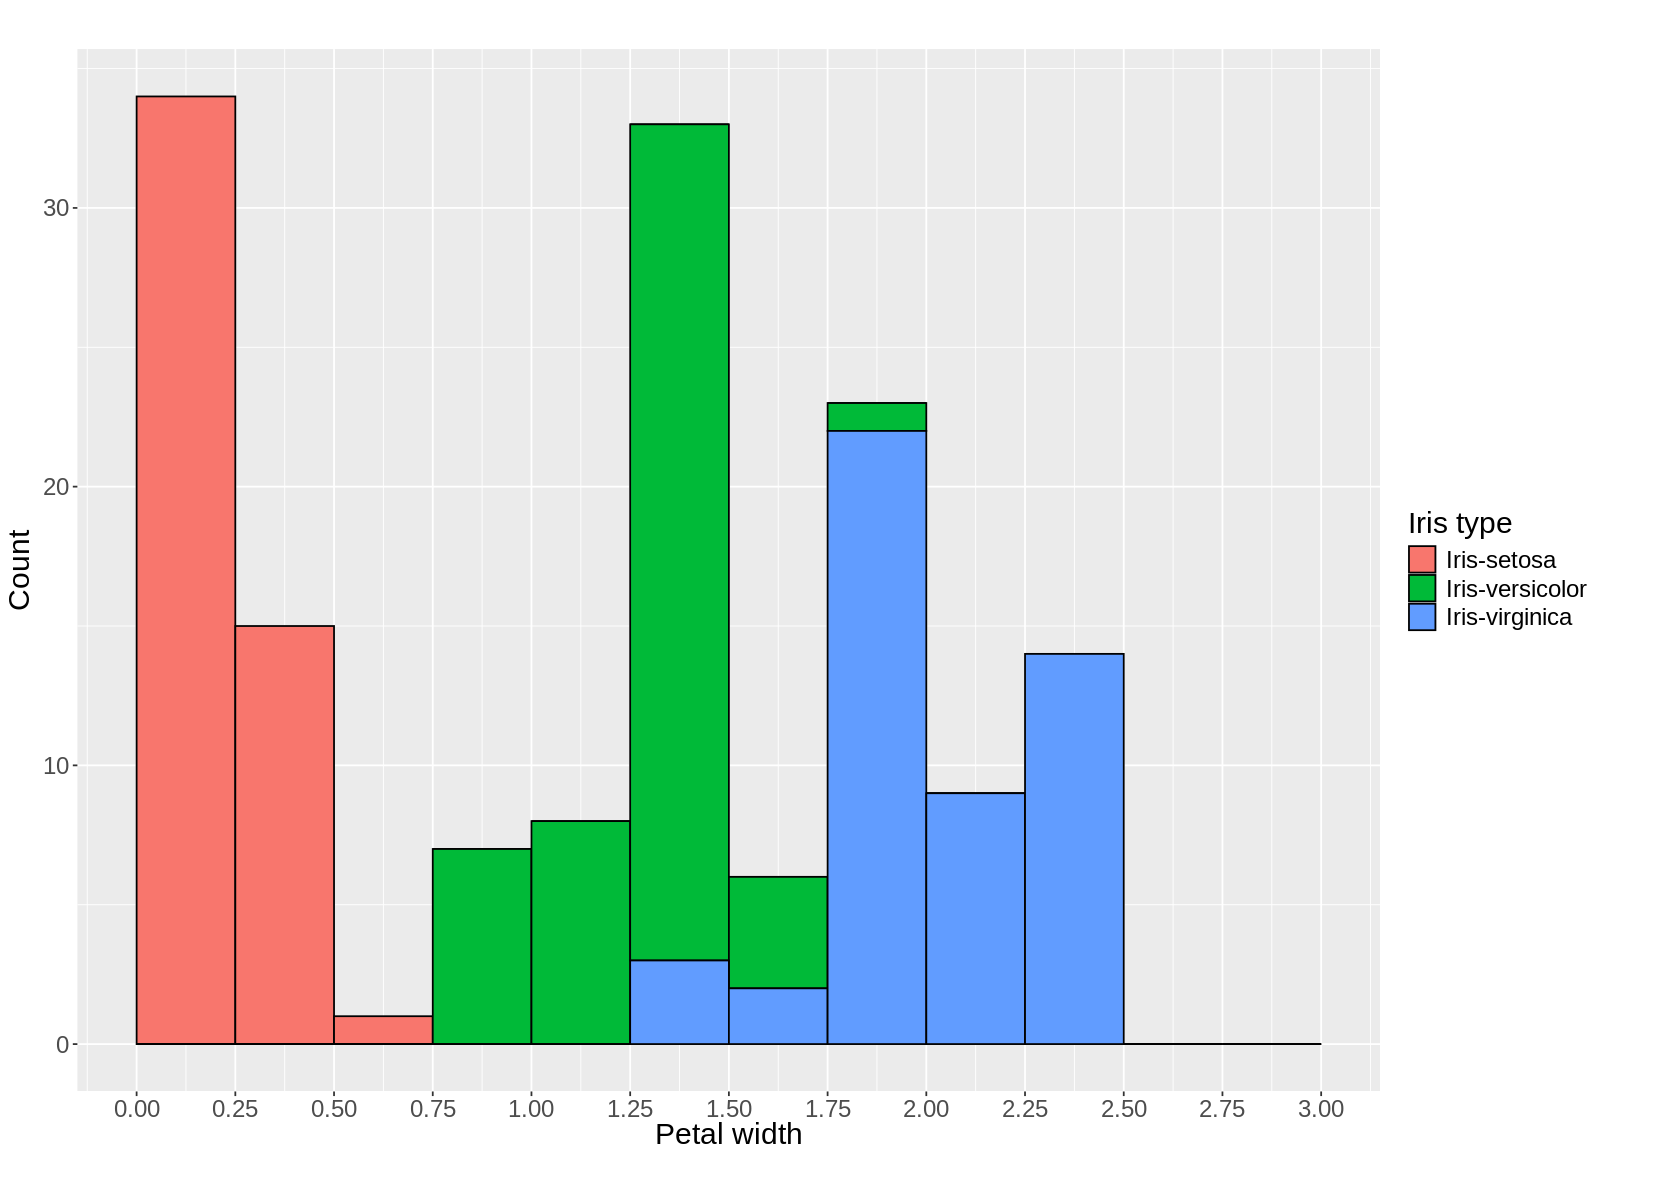

In [ ]:
options(repr.plot.width = 14, repr.plot.height = 10)
ggplot(data = d, mapping = aes(x = petal_width, fill = iris_type)) +
  geom_histogram(breaks = seq(0, 3, by = 0.25), color = 'black') +
  scale_x_continuous(limits = c(0, 3), breaks = seq(0, 3, by = 0.25)) +
  labs(x = "Petal width", y = "Count", fill = "Iris type") +
  theme(aspect.ratio = 0.8, text = element_text(size = 18))

# Heatmaps

In [ ]:
install.packages("reshape2")
library(reshape2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




In [ ]:
c = cor(d[sapply(d, is.numeric)])

In [ ]:
c

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.0000000,-0.1175698,0.8717538,0.8179411
sepal_width,-0.1175698,1.0000000,-0.4284401,-0.3661259
petal_length,0.8717538,-0.4284401,1.0000000,0.9628654
petal_width,0.8179411,-0.3661259,0.9628654,1.0000000


In [ ]:
c = melt(c) %>%
  rename(x_feature = Var1, y_feature = Var2)

In [ ]:
c %>% head()

x_feature,y_feature,value
<fct>,<fct>,<dbl>
sepal_length,sepal_length,1.0000000
sepal_width,sepal_length,-0.1175698
petal_length,sepal_length,0.8717538
petal_width,sepal_length,0.8179411
sepal_length,sepal_width,-0.1175698
sepal_width,sepal_width,1.0000000
petal_length,sepal_width,-0.4284401
petal_width,sepal_width,-0.3661259
sepal_length,petal_length,0.8717538


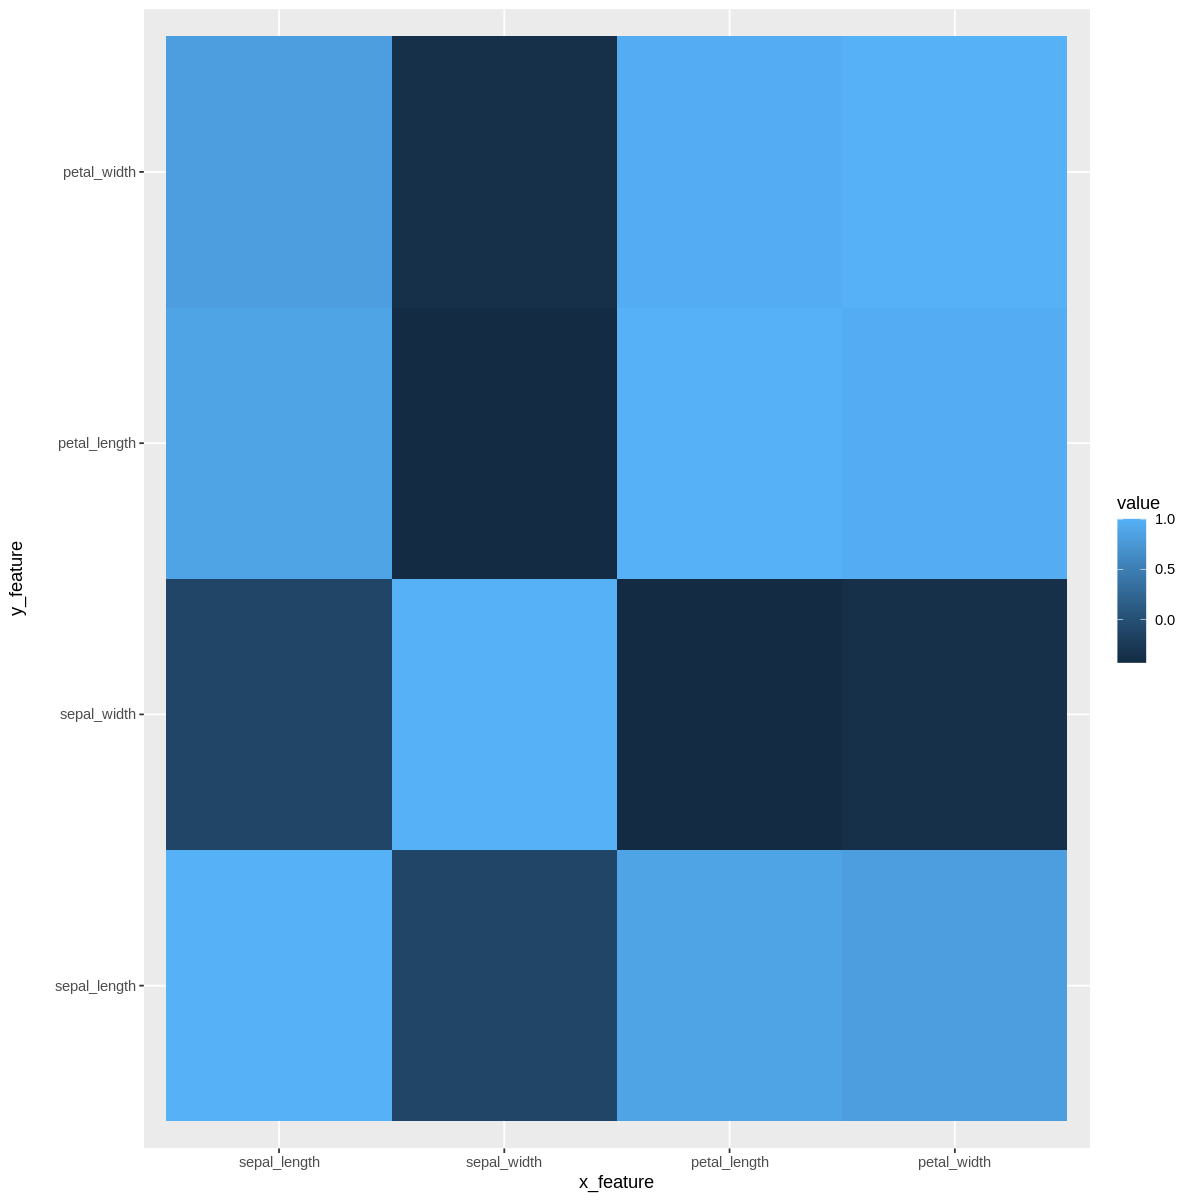

In [ ]:
ggplot(data = c, mapping = aes(x = x_feature, y = y_feature, fill = value)) +
  geom_tile()

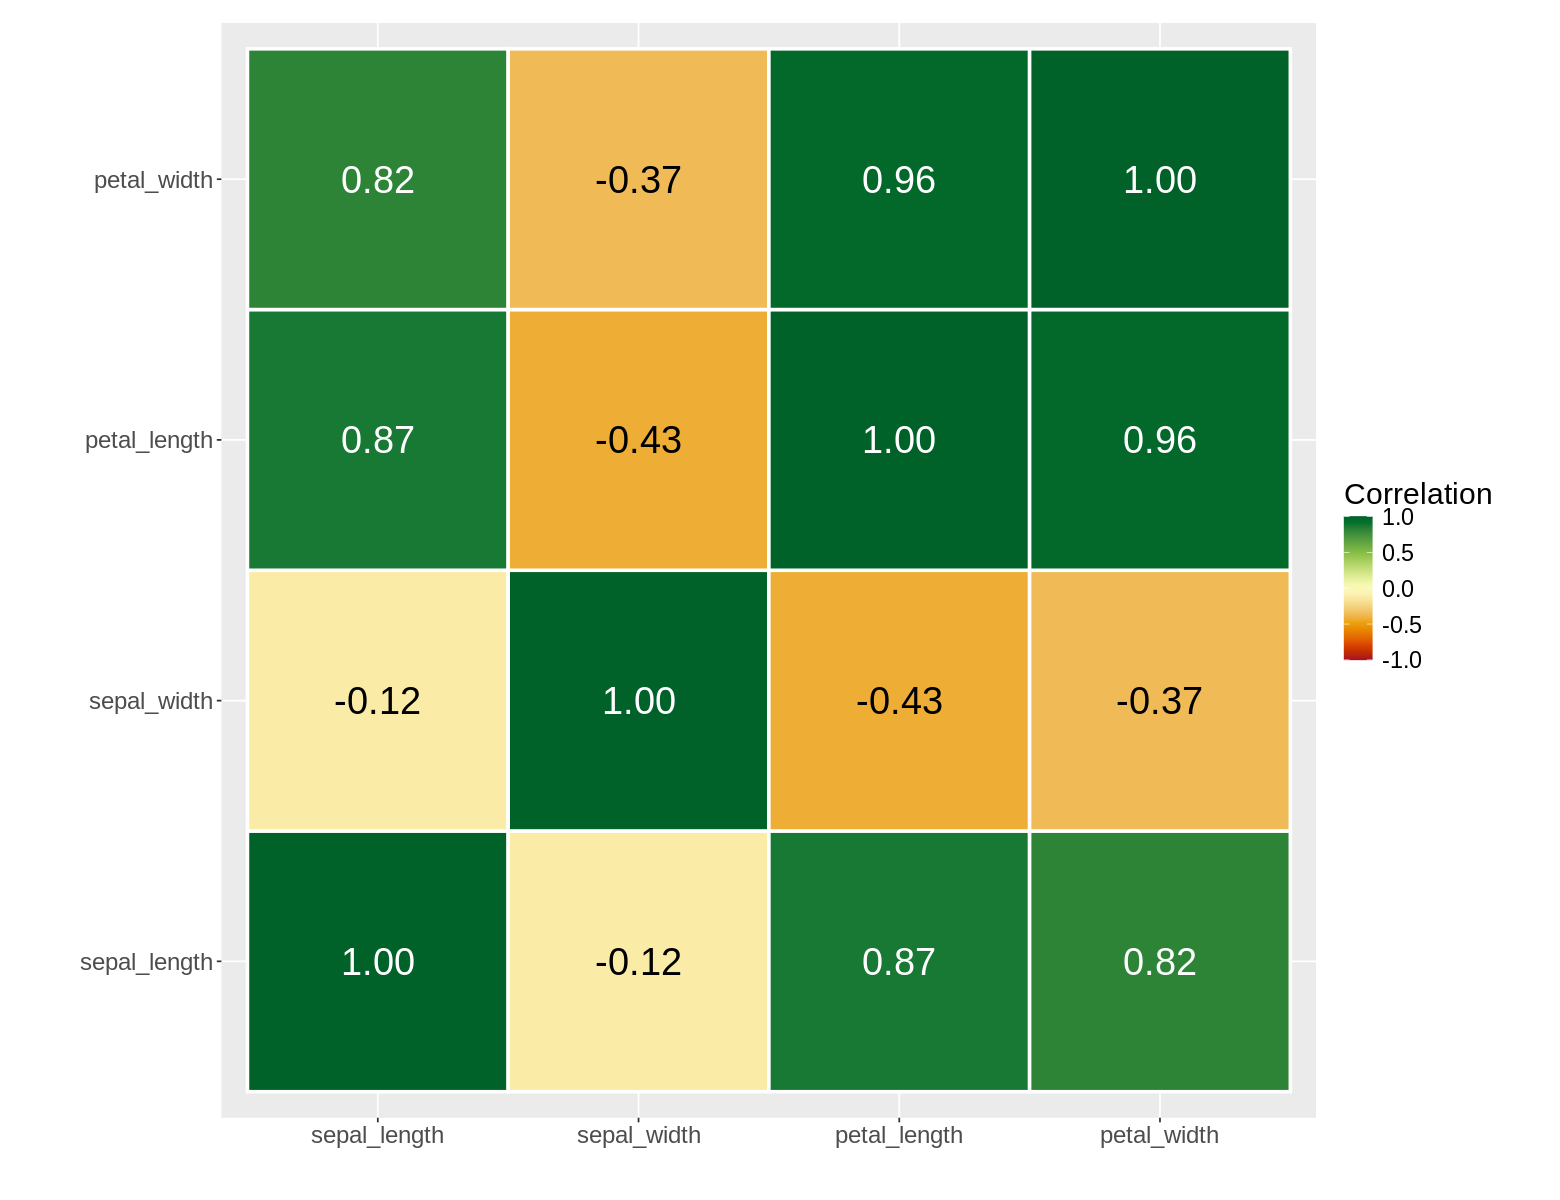

In [ ]:
options(repr.plot.width = 13, repr.plot.height = 10)
ggplot(data = c, mapping = aes(x = x_feature, y = y_feature, fill = value)) +
  geom_tile(color = 'white', linewidth = 1) +
  geom_text(mapping = aes(
    x = x_feature,
    y = y_feature,
    label = sprintf("%0.2f", value),
    colour = ifelse(value < 0, 'black', 'white')),
    size = 8) +
  scale_colour_manual(values = c("white" = "white", "black" = "black"), guide = "none") +
  scale_fill_gradientn(colors = hcl.colors(20, "RdYlGn"), limits = c(-1, 1)) +
  labs(x = "", y = "", fill = "Correlation") +
  theme(aspect.ratio = 1, text = element_text(size = 18), legend.text = element_text(size = 14))

# Time series plot

In [ ]:
system("gdown 1wdwvUZz4-XWW5r40gfVFzDgkH2Jk1Wen")

Rows: 22550 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): page
dbl  (1): count
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
library(tidyr)


Attaching package: ‘tidyr’


The following object is masked from ‘package:reshape2’:

    smiths




In [ ]:
w = read_csv("/content/wiki.csv") %>%
  filter(! grepl(":", page)) %>% # Exclude special pages
  separate_wider_regex(cols = c("page"), patterns = c("page" = ".*", "_", "lang" = ".*")) %>% # Split page name and language
  filter(lang == "en") %>% # Keep English pages only
  select(-lang) %>% # Drop the lang column
  mutate(page = gsub('_', ' ', page)) %>% # Replace '_' with ' ' in page titles
  group_by(page, date) %>% # There are multiple entries with the same page and date:
  summarise(across("count", sum)) # Merge them together summing the page counts

Rows: 22550 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): page
dbl  (1): count
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'page'. You can override using the
`.groups` argument.


In [ ]:
top5 = w %>%
  group_by(page) %>%
  summarise(across("count", sum)) %>%
  arrange(-count) %>%
  head(5) %>%
  pull("page")

In [ ]:
top5 # Top five pages by total views

[1] "Lali Espósito"                            
[2] "Java (programming language)"              
[3] "United States presidential election, 2016"
[4] "United States"                            
[5] "Prince (musician)"

In [ ]:
w = w %>%
  filter(page %in% top5)

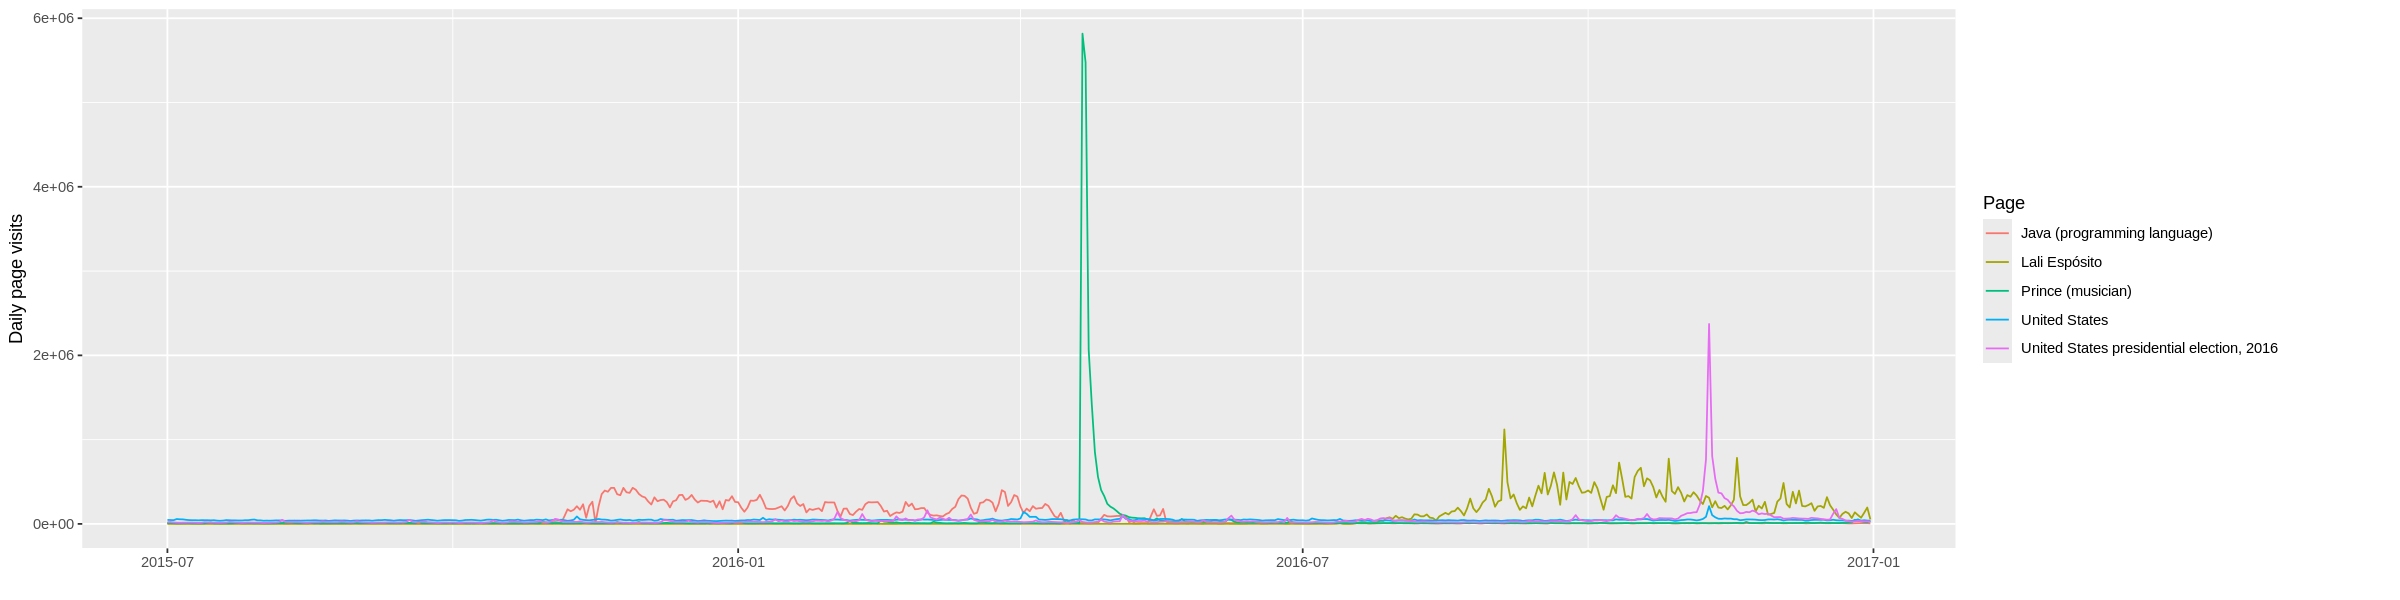

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 5)
ggplot(data = w, mapping = aes(x = date, y = count, colour = page)) +
  geom_line() +
  labs(x = "", y = "Daily page visits", colour = "Page")

Let's improve on it.

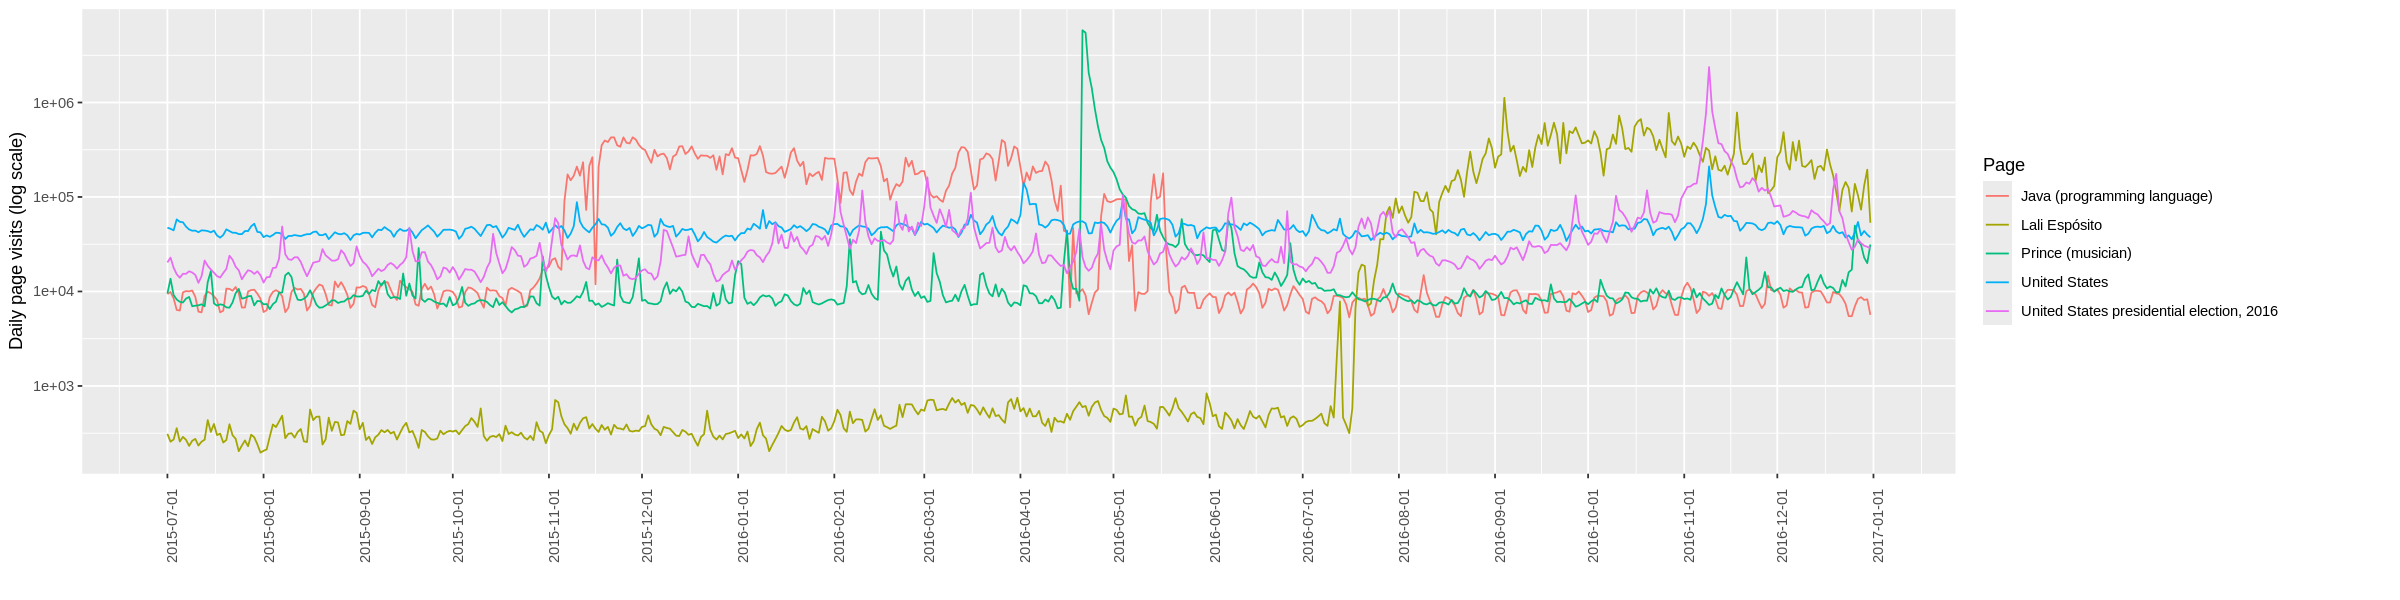

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 5)
ggplot(data = w, mapping = aes(x = date, y = count, colour = page)) +
  geom_line() +
  scale_x_date(date_labels = "%Y-%m-%d", date_breaks = "1 month") +
  scale_y_continuous(trans = "log", breaks = c(1 %o% 10^(0:7))) +
  labs(x = "", y = "Daily page visits (log scale)", colour = "Page") +
  theme(axis.text.x = element_text(angle = 90))